In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import gradio as gr
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv(r"E:\AYUSH\ML PCLUB\house-prices-advanced-regression-techniques\train.csv")
string_df = data.select_dtypes(include=["object"])
label_encoder = LabelEncoder()
colu = string_df.columns.tolist()
additional_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
colu.extend(additional_columns)
data_train=data

for i,value in enumerate(colu):
    
    
    data_train[value] = label_encoder.fit_transform(data_train[value])
columns1=data_train.columns.tolist()
columns1

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data_train' is your DataFrame and 'columns1' contains column names
for i, index in enumerate(columns1):
    x = pd.DataFrame()
    x[index] = data_train[index]
    x["SalePrice"] = data_train["SalePrice"]

    kmeans = KMeans(n_clusters=6)
    kmeans.fit(x.values)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.scatter(x[index], x["SalePrice"], c=labels, cmap='viridis', marker='o', edgecolors='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel(index)
    plt.ylabel('SalePrice')
    plt.title(f'K-means Clustering for {index} and SalePrice')
    plt.legend()
    plt.show()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 4582] System Integrity policy has been violated.  Explicit denied file
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\L

IndexError: index 1 is out of bounds for axis 1 with size 1

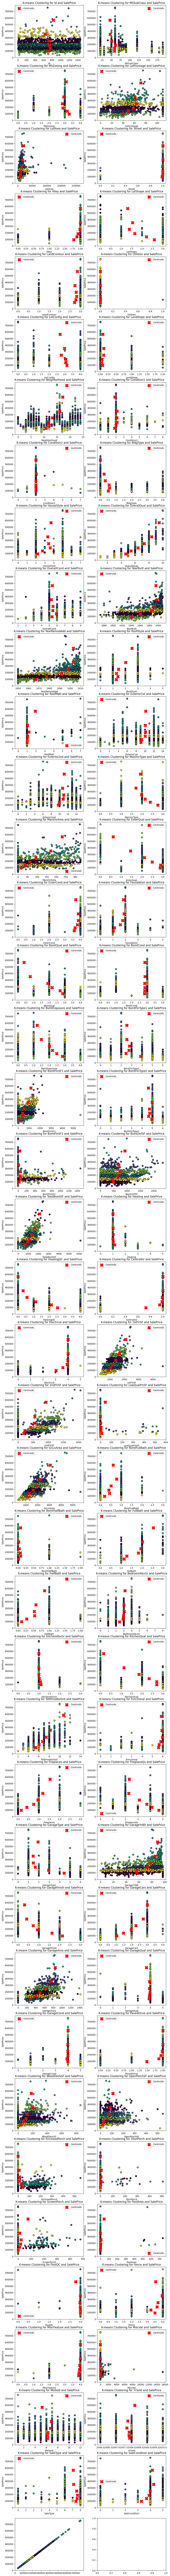

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data_train' is your DataFrame and 'columns1' contains column names
num_cols = len(columns1)
num_rows = (num_cols + 1) // 2  # Adjust the number of rows based on your preference

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

for i, index in enumerate(columns1):
    row = i // 2
    col = i % 2

    x = pd.DataFrame()
    x[index] = data_train[index]
    x["SalePrice"] = data_train["SalePrice"]

    kmeans = KMeans(n_clusters=6)
    kmeans.fit(x.values)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    ax = axes[row, col]
    ax.scatter( x[index],x['SalePrice'], c=labels, cmap='viridis', marker='o', edgecolors='k', s=50)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_xlabel(index)
    ax.set_ylabel("SalePrice")
    ax.set_title(f'K-means Clustering for {index} and SalePrice')
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
def model(features):
    
    data=pd.read_csv(r"E:\AYUSH\ML PCLUB\house-prices-advanced-regression-techniques\train.csv")
    string_df = data.select_dtypes(include=["object"])
    label_encoder = LabelEncoder()
    colu = string_df.columns.tolist()
    additional_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
    colu.extend(additional_columns)
    data_train=data

    for i,value in enumerate(colu):
        
        
        data_train[value] = label_encoder.fit_transform(data_train[value])
    corr=data_train.corr()
    
    y=np.array(data_train["SalePrice"])
    X=np.array(data_train.drop(["SalePrice","Id"],axis=1))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    neigh = KNeighborsRegressor(n_neighbors=6)
    neigh.fit(X_train,y_train)
    y_predict=neigh.predict(X_test)
    error=mean_absolute_error(y_test,y_predict)
    
    
    em=features.select_dtypes(include=["object"])

    colu = em.columns.tolist()
    
    
    additional_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
    colu.extend(additional_columns)
    for i,value in enumerate(colu):
    
        
        
        features[value] = label_encoder.fit_transform(features[value])
    
    features__array=np.array(features)
    salePrice=neigh.predict(features__array)
    return salePrice

In [7]:
def cov( MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,s1tFlrSF,n2dFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,S3snPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition):
    data_mapping = {
    
    'MSSubClass': MSSubClass,
    'MSZoning': MSZoning,
    'LotFrontage': LotFrontage,
    'LotArea': LotArea,
    
    'Street': Street,
    'Alley': Alley,
    'LotShape': LotShape,
    'LandContour': LandContour,
    'Utilities': Utilities,
    'LotConfig': LotConfig,
    'LandSlope': LandSlope,
    'Neighborhood': Neighborhood,
    'Condition1': Condition1,
    'Condition2': Condition2,
    'BldgType': BldgType,
    'HouseStyle': HouseStyle,
    'OverallQual': OverallQual,
    'OverallCond': OverallCond,
    'YearBuilt': YearBuilt,
    'YearRemodAdd': YearRemodAdd,
    'RoofStyle': RoofStyle,
    'RoofMatl': RoofMatl,
    'Exterior1st': Exterior1st,
    'Exterior2nd': Exterior2nd,
    'MasVnrType': MasVnrType,
    'MasVnrArea': MasVnrArea,
    'ExterQual': ExterQual,
    'ExterCond': ExterCond,
    'Foundation': Foundation,
    'BsmtQual': BsmtQual,
    'BsmtCond': BsmtCond,
    'BsmtExposure': BsmtExposure,
    'BsmtFinType1': BsmtFinType1,
    'BsmtFinSF1': BsmtFinSF1,
    'BsmtFinType2': BsmtFinType2,
    'BsmtFinSF2': BsmtFinSF2,
    'BsmtUnfSF': BsmtUnfSF,
    'TotalBsmtSF': TotalBsmtSF,
    'Heating': Heating,
    'HeatingQC': HeatingQC,
    'CentralAir': CentralAir,
    'Electrical': Electrical,
    '1stFlrSF': s1tFlrSF,
    '2ndFlrSF': n2dFlrSF,
    'LowQualFinSF': LowQualFinSF,
    'GrLivArea': GrLivArea,
    'BsmtFullBath': BsmtFullBath,
    'BsmtHalfBath': BsmtHalfBath,
    'FullBath': FullBath,
    'HalfBath': HalfBath,
    'BedroomAbvGr': BedroomAbvGr,
    'KitchenAbvGr': KitchenAbvGr,
    'KitchenQual': KitchenQual,
    'TotRmsAbvGrd': TotRmsAbvGrd,
    'Functional': Functional,
    'Fireplaces': Fireplaces,
    'FireplaceQu': FireplaceQu,
    'GarageType': GarageType,
    'GarageYrBlt': GarageYrBlt,
    'GarageFinish': GarageFinish,
    'GarageCars': GarageCars,
    'GarageArea': GarageArea,
    'GarageQual': GarageQual,
    'GarageCond': GarageCond,
    'PavedDrive': PavedDrive,
    'WoodDeckSF': WoodDeckSF,
    'OpenPorchSF': OpenPorchSF,
    'EnclosedPorch': EnclosedPorch,
    '3SsnPorch': S3snPorch,
    'ScreenPorch': ScreenPorch,
    'PoolArea': PoolArea,
    'PoolQC': PoolQC,
    'Fence': Fence,
    'MiscFeature': MiscFeature,
    'MiscVal': MiscVal,
    'MoSold': MoSold,
    'YrSold': YrSold,
    'SaleType': SaleType,
    'SaleCondition': SaleCondition
    
    }
    df = pd.DataFrame([data_mapping])  
    saleprice=model(df)
    return saleprice   

In [8]:
def interface():
    demo =gr.Interface(
        cov,
        inputs=[
            gr.Number(label="MSSubClass"),
            gr.Dropdown(["A","C","FV","I","RH","RL","RP","RM"],label="MSZoning",info="Choose general zoning classfication of the sale"),
            gr.Number(label="LotFrontage"),
            gr.Number(label="LotArea"),
        
            gr.Dropdown(["Grvl","Pave"],label="Street",info="Type of road access to property"),
            gr.Dropdown(["Grvl","Pave","NA"],label="Alley",info="Chosse Type of alley access to property"),
            gr.Dropdown(["Reg","IR1","IR2","IR3"],label="LotShape (REG=regular,IR1=Slightly irregular,IR2=Moderately Irregular,IR3=Irregular)",info="chosse General Shape of Property "),
            gr.Dropdown(["Lvl","Bnk","HLS","Low"],label="LandContour",info="chose Flatness of the property"),
        
            gr.Dropdown(["AllPub","NoSewr","NoSewa","ELO"],label="Utilities",info="choose Type of utilities available"),
            gr.Dropdown(["Inside","Corner","CulDsac","FR2","FR3"],label="LotConfig",info="choose Lot configuration "),
            gr.Dropdown(["Gtl","Mod","Sev"],label="Landslope",info="chosse Slope of property"),
            gr.Dropdown(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown'],label="Neighborhood",info="Choose Physical locations within Ames city limits"),
            gr.Dropdown(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],label="Condition1",info=" choose Proximity to various conditions "),
            gr.Dropdown(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'],label="Condition2",info="choose Proximity to various conditions"),
            gr.Dropdown(["1Fam","2FmCon","Duplx","TwnhsE","TwnhsI"],label="BldgType",info="choose Type of dwelling"),
        
            gr.Dropdown(['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],label="HouseStyle",info="Choose style of dwelling "),
            gr.Number(label="OverallQual(integers 1 to 10)"),
            gr.Number(label="OverallCond(integers 1 to 10)"),
            gr.Number(label="YearBuilt"),
            gr.Number(label="YearRemodAdd"),
            gr.Dropdown(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'],label="RoofStyle",info="choose Type of roof"),
            gr.Dropdown(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'],label="RoofMatl",info="choose Roof material"),
            gr.Dropdown(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],label="Exterior1st",info="choose Exterior covering on house"),
            gr.Dropdown(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],label="Exterior2nd",info=" choose Exterior covering on house"),
            gr.Dropdown(['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'],label="MasVnrType",info=" choose masonry veneer type"),
            gr.Number(label="MasVnrArea"),
            gr.Dropdown(["Ex","Gd","TA","Fa","Po"],label="ExterQual",info=" choose the quality of exterior matrial"),
            gr.Dropdown(["Ex","Gd","TA","Fa","Po"],label="ExterCond",info=" choose the quality of exterior matrial"),
            gr.Dropdown(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'],label="Foundation",info="Choose the type of foundation "),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],label="BsmtQual",info=" choose the height of the basement "),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],label="BsmtCond",info=" choose the height of the basement "),
            gr.Dropdown(["Gd","Av","Mn","No","NA"],label="BsmtExposure",info="choose exposure"),
            gr.Dropdown(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],label="BsmtFinType1",info=" choose rating of basement finished area"),
            gr.Number(label="BsmtFinSF1"),
            gr.Dropdown(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],label="BsmtFinType2",info=" choose rating of basement finished area"),
            gr.Number(label="BsmtFinSF2"),
            gr.Number(label="BsmtUnfSF"),
            gr.Number(label="TotalBsmtSF"),
            gr.Dropdown(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'],label="Heating",info="choose type of heating "),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'Po'],label="HeatingQC",info="choose heating quality and condtion "),
            gr.Dropdown(["N","Y"],label="CentralAir",info="central air condtioning or not?"),
            gr.Dropdown(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'],label="Electrical",info="choose electrical system "),
            gr.Number(label="1stFlrSF"),
            gr.Number(label="2ndFlrSF"),
            gr.Number(label="LowQualFinSF"),
            gr.Number(label="GrLivArea"),
            gr.Number(label="BsmtFullBath"),
            gr.Number(label="BsmtHalfBath"),
            gr.Number(label="FullBath"),
            gr.Number(label="HalfBath"),
            gr.Number(label="Bedroom"),
            gr.Number(label="Kitchen"),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'Po'],label="KitchenQual",info=" choose kitchen quality"),
        
            gr.Number(label="TotRmsAbvGrd"),
            gr.Dropdown(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],label="Functional",info="choose home functionality"),
            gr.Number(label="Fireplaces"),
            gr.Dropdown(["Ex","Gd","Ta","Fa","Po","NA"],label="FireplaceQu"),
            gr.Dropdown(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'],label="GarageType",info=" choose Garage location"),
            gr.Number(label="GarageYrBlt"),
            gr.Dropdown(["Fin","RFn","Unf","NA"],label="GarageFinish",info="choose interior finish of the garage"),
            gr.Number(label="GarageCars"),
            gr.Number(label="GarageArea"),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],label="GarageQual",info=" choose the height of the basement "),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],label="GarageCond",info=" choose the height of the basement "),
            gr.Dropdown(["Y","P","N"],label="PavedDrive",info="choose paved drive"),
            gr.Number(label="WoodDeckSF"),
            gr.Number(label="OpenPorchSF"),
            gr.Number(label="EnclosedPorch"),
            gr.Number(label="3SsnPorch"),
            gr.Number(label="ScreenPorch"),
            gr.Number(label="PoolArea"),
            gr.Dropdown(['Ex', 'Gd', 'TA', 'Fa', 'NA'],label="PoolQC",info="choose pool quality"),
            gr.Dropdown(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],label="Fence",info="Choose fence "),
            gr.Dropdown(['Elev', 'Gar2', 'Othr', 'Shed', 'TenC', 'NA'],label="MiscFeature",info= "choose Miscellaneous feature not covered in other categories"),
            gr.Number(label="MiscVal"),
            gr.Number(label="MoSold"),
            gr.Number(label="YrSold"),
            gr.Dropdown(['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'],label="SaleType",info="CHOOSE type of sale"),
            gr.Dropdown(['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'],label="SaleCondition",info="choose condition of sale ")
        
        ],
        outputs=gr.Number(label="SalePrice")

    )
    demo.launch()

In [9]:
interface()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
